<a href="https://colab.research.google.com/github/safaltasaxena/deep-learning-mini-projects/blob/main/neural-network-from-scratch-gradient-descent/NN_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Activation fucntions

In [ ]:
#sigmoid
import math
def sigmoid(x):
  return 1/(1+math.exp(-x))
sigmoid(100)

1.0

In [ ]:
sigmoid(1)
#so sigmoid simply converts any num to 0-1

0.7310585786300049

In [ ]:
#tanh
def tanh(x):
  return (math.exp(x)-math.exp(-x))/(math.exp(x)+math.exp(-x))
tanh(100)

1.0

In [ ]:
tanh(-2)
#so tanh simply converts any num to 1 to (-1)

-0.964027580075817

In [ ]:
#ReLU
def relu(x):
  return max(0,x)
relu(10)

10

In [ ]:
relu(-7)
#so relu simply converts negative num to 0 and postivie num to that only

0

In [ ]:
#leaky relu
def leaky_relu(x):
  return max(0.1*x,x)
leaky_relu(-7)

-0.7000000000000001

In [ ]:
leaky_relu(10)
#so leaky relu simply converts the positve num to that only and negative to 0.1
#times of that num

10

=>how neural network training works??

-gradient descent

-error back prop. algo.

-chaining rule

=>prerequsites

-derivatives

-partial derivatives

Matrix operations

In [ ]:
import numpy as np
revenue = np.array([[180,200,220],[24,36,40],[12,18,20]])
expenses = np.array([[80,90,100],[10,16,20],[8,10,10]])
price_per_unit = np.array([1000,400,1200])
units = np.array([[30,40,50],[5,10,15],[2,5,7]])
#substraction
profit = revenue - expenses
profit

array([[100, 110, 120],
       [ 14,  20,  20],
       [  4,   8,  10]])

In [ ]:
#multiplication,#over here it expanded smaller matrix to make it a 3*3
price_per_unit*units

array([[30000, 16000, 60000],
       [ 5000,  4000, 18000],
       [ 2000,  2000,  8400]])

In [ ]:
#we wanted 1*3=1 row so thats dot product
np.dot(price_per_unit,units)

array([34400, 50000, 64400])

Loss or Cost fnc

In [ ]:
import numpy as np
y_predicted=np.array([1,1,0,0,1])
y_true=np.array([0.30,0.7,1,0,0.5])
def mae(y_true,y_predicted):
  total_error=0
  #to run for loop parallely in 2 arrays we use zip fnc
  for yt,yp in zip(y_true,y_predicted):
    total_error+=abs(yt-yp)
  print('total error:',total_error)
  mae=total_error/len(y_true)
  print('mean absolute error:',mae)
mae(y_true,y_predicted)

total error: 2.5
mean absolute error: 0.5


In [ ]:
#direct using np arrays no fnc defn required
np.mean(np.abs(y_predicted-y_true))
#np.sum for total error

np.float64(0.5)

now we know thst log 0 is not defined and log 1 is 0 thus we will define epsilon

In [ ]:
epsilon=1e-15
#list comprehension
y_predicted_new=[max(i,epsilon) for i in y_predicted]
y_predicted_new=[min(i,1-epsilon) for i in y_predicted_new]
y_predicted_new

[0.999999999999999, 0.999999999999999, 1e-15, 1e-15, 0.999999999999999]

In [ ]:
y_predicted_new=np.array(y_predicted_new)
np.log(y_predicted_new)

array([-9.99200722e-16, -9.99200722e-16, -3.45387764e+01, -3.45387764e+01,
       -9.99200722e-16])

In [ ]:
-np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

np.float64(17.2696280766844)

now putting everything in one single fnc we get

In [ ]:
def log_loss(y_true,y_predicted):
  y_predicted_new=[max(i,epsilon) for i in y_predicted]
  y_predicted_new=[min(i,1-epsilon) for i in y_predicted_new]
  y_predicted_new=np.array(y_predicted_new)
  return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))
log_loss(y_true,y_predicted)

np.float64(17.2696280766844)

Gradient Descent

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()


Saving insurance.csv to insurance.csv


In [ ]:
df=pd.read_csv('insurance.csv')
df.head()

,age,aff,have_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['age','aff']],df.have_insurance,test_size=0.2,random_state=25)
#scaling the data since age is 1 to 100 while aff is 0 or 1
x_train_scaled=x_train.copy()
x_train_scaled['age']=x_train_scaled['age']/100
x_test_scaled=x_test.copy()
x_test_scaled['age']=x_test_scaled['age']/100
#now both age and aff are bw 0 to 1 so same scale now th ml model will ten to work better
#now we will create our neural network
model=keras.Sequential([
    keras.layers.Dense(1,input_shape=(2,),activation='sigmoid',kernel_initializer='ones',bias_initializer='zeros')
])
#kernel is weight which is initialized to be 1 and bias is initialised to be 0
#input if age and aff thus 2 while op is have_insurnace thus 1
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              #same as log loss
              metrics=['accuracy'])
model.fit(x_train_scaled,y_train,epochs=500)#needed 5k though

Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step - accuracy: 0.6000 - loss: 0.6552
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.6000 - loss: 0.6549
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6000 - loss: 0.6547
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.6000 - loss: 0.6545
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6000 - loss: 0.6543
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6000 - loss: 0.6541
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6000 - loss: 0.6539
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.6000 - loss: 0.6537
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.6000 - loss: 0.6535
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.6000 - loss: 0.6533
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6000 - loss: 0.6530
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6000 - loss: 0.6

In [ ]:
model.evaluate(x_test_scaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.3333 - loss: 0.7536


[0.7535776495933533, 0.3333333432674408]

In [ ]:
#to know the final weights and biases of our model
coef , intercept = model.get_weights()
coef , intercept

(array([[1.5345628 ],
        [0.63016886]], dtype=float32),
 array([-0.39529076], dtype=float32))

In [ ]:
def sigmoid(x):
  import math
  return 1/(1+math.exp(-x))
def pred_fnc(age,aff):
  ws=coef[0]*age + coef[1]*aff + intercept
  return sigmoid(ws)
pred_fnc(0.47,1)

/tmp/ipython-input-18-1051333782.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1/(1+math.exp(-x))


0.722344821199355

In [ ]:
#now implementing gradient descent from scarcth
def log_loss(y_true,y_predicted):
  epsilon=1e-15
  y_predicted_new=[max(i,epsilon) for i in y_predicted]
  y_predicted_new=[min(i,1-epsilon) for i in y_predicted_new]
  y_predicted_new = np.array(y_predicted_new)
  return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))
#instead of one value it takes entire array and returns each sigmoid
def sigmoid_numpy(x):
  return 1/(1+np.exp(-x))
sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [ ]:
#will return w1 w2 and bias
def gradient_descent(age,affordability,y_true,epochs,loss_thershold):
#loss thershold bascially helps in stop iterating when we reach optimum loss
 w1=w2=1
 bias=0
 rate=0.5
 n=len(age)

 for i in range(epochs):
   ws=w1*age + w2*affordability + bias
   y_predicted=sigmoid_numpy(ws)
   loss=log_loss(y_true,y_predicted)
   w1d=(1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
   w2d=(1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true))
   bias_d=np.mean(y_predicted-y_true)
   w1=w1-rate*w1d
   w2=w2-rate*w2d
   bias=bias-rate*bias_d
   print(f'epoch:{i},w1:{w1},w2:{w2},bias:{bias},loss:{loss}')
   if loss<=loss_thershold:
     break
 return w1,w2,bias
gradient_descent(x_train_scaled['age'],x_train_scaled['aff'],y_train,1000,0.5993)

epoch:0,w1:0.9953023510435051,w2:0.9589316923292891,bias:-0.061521372825103324,loss:0.6551533000097722
epoch:1,w1:0.993910363508503,w2:0.9229449877737186,bias:-0.11492051744354004,loss:0.6448842970323124
epoch:2,w1:0.9954617896524035,w2:0.891582187553737,bias:-0.16108305206320225,loss:0.6371406708513416
epoch:3,w1:0.9995943354400736,w2:0.8643542574577828,bias:-0.2008910331891214,loss:0.631323431585787
epoch:4,w1:1.0059608511098919,w2:0.8407710950196449,bias:-0.23518694061777196,loss:0.6269452988730868
epoch:5,w1:1.0142393890659045,w2:0.8203633699084859,bias:-0.2647501257590066,loss:0.623623723434239
epoch:6,w1:1.0241388214587746,w2:0.8026964734931715,bias:-0.2902839303638856,loss:0.6210669192714671
epoch:7,w1:1.0354010237980271,w2:0.7873780043929964,bias:-0.3124109840420571,loss:0.6190574546564643
epoch:8,w1:1.0478006423445003,w2:0.7740604570653357,bias:-0.3316742051530844,loss:0.6174363139122309
epoch:9,w1:1.0611433166350694,w2:0.7624406458419507,bias:-0.3485414091741281,loss:0.616088

(np.float64(1.4402808184029094),
 np.float64(0.6610812530153767),
 np.float64(-0.5275039300896781))

In [ ]:
coef , intercept

(array([[1.5345628 ],
        [0.63016886]], dtype=float32),
 array([-0.39529076], dtype=float32))

implementing neural network from scratch

In [ ]:
class myNN:

  #constructor
  def __init__(self):
    self.w1=1
    self.w2=1
    self.bias=0

  def fit(self,x,y,epochs,loss_threshold):
    self.w1 , self.w2 , self.bias = self.gradient_descent(x['age'],x['aff'],y,epochs,loss_threshold)

  def predict(self,x_test):
    weighted_sum = self.w1*x_test['age'] + self.w2*x_test['aff'] + self.bias
    return sigmoid_numpy(weighted_sum)

  def gradient_descent(self,age,affordability,y_true,epochs,loss_threshold):
    w1=w2=1
    bias=0
    rate=0.5
    n=len(age)

    for i in range(epochs):
      ws=w1*age + w2*affordability + bias
      y_predicted=sigmoid_numpy(ws)
      loss=log_loss(y_true,y_predicted)
      w1d=(1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
      w2d=(1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true))
      bias_d=np.mean(y_predicted-y_true)
      w1=w1-rate*w1d
      w2=w2-rate*w2d
      bias=bias-rate*bias_d


      if i%50==0:
        print(f'epoch:{i},w1:{w1},w2:{w2},bias:{bias},loss:{loss}')

      if loss<=loss_threshold:
        print(f'epoch:{i},w1:{w1},w2:{w2},bias:{bias},loss:{loss}')
        break

    return w1,w2,bias

In [ ]:
customModel= myNN()
customModel.fit(x_train_scaled,y_train,epochs=500,loss_threshold=0.5993)

NameError: name 'myNN' is not defined

In [ ]:
coef,intercept

(array([[1.5345628 ],
        [0.63016886]], dtype=float32),
 array([-0.39529076], dtype=float32))

In [ ]:
customModel.predict(x_test_scaled)

,0
11,0.631081
8,0.736247
3,0.555135


In [ ]:
model.predict(x_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


array([[0.66028297],
       [0.76607996],
       [0.5993318 ]], dtype=float32)

stohastic vs batch vs mini gradient descent

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving homeprices_banglore.csv to homeprices_banglore.csv


In [ ]:
#batch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [ ]:
from sklearn import preprocessing
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()
x_scaled=sx.fit_transform(df.drop('price',axis='columns'))
y_scaled=sy.fit_transform(df['price'].values.reshape(-1,1))
#batch
def batch_gradient_descent(x,y_true,epochs,learning_rate=0.01):
  number_of_features=x.shape[1]
  y_true=y_true.flatten()
  #x.shape[0] gives no of rows(samples) of x datatset
  #x.shape[1] gives no of columns(features) of x dataset
  w=np.ones(shape=( number_of_features)) # Reshape w to (1, 2)
  b=0
  total_samples=x.shape[0]
  cost_list=[]
  epoch_list=[]
  for i in range(epochs):

    y_predicted=np.dot(w,x.T) + b

    w_grad=-(2/total_samples)*(x.T.dot(y_true-y_predicted))
    b_grad=-(2/total_samples)*np.sum(y_true-y_predicted)

    w=w-learning_rate*w_grad
    b=b-learning_rate*b_grad

    cost=np.mean(np.square(y_true-y_predicted))

    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)
  cost=cost_list[-1]
  return w,b,cost,cost_list,epoch_list
w,b,cost,cost_list,epoch_list=batch_gradient_descent(x_scaled,y_scaled,500)
w,b,cost

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.006942030224616903))

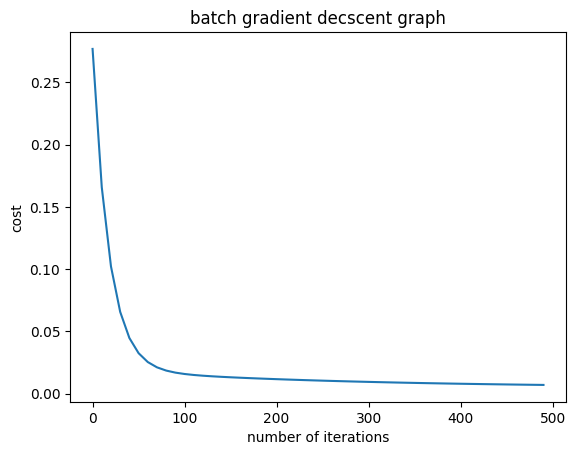

In [ ]:
plt.title("batch gradient decscent graph")
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [ ]:
def prediction(area,bedrooms,w,b):
  scaled_x=sx.transform([[area,bedrooms]])
  scaled_price=w[0]*scaled_x[0][0]+w[1]*scaled_x[0][1]+b
  return sy.inverse_transform([[scaled_price]])
prediction(2600,4,w,b)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[128.45484403]])

In [ ]:
#stochastic
import random
def stochastic_gradient_descent(x,y_true,epochs,learning_rate=0.01):

  number_of_features=x.shape[1]
  w=np.ones(shape=number_of_features) # Initialize w as a 1D array
  b=0
  total_samples=x.shape[0]
  cost_list=[]
  epoch_list=[]

  for i in range(epochs):
    random_index=random.randint(0,total_samples-1)

    y_true=y_true.flatten()

    sample_x=x[random_index]
    sample_y=y_true[random_index]

    y_predicted=np.dot(w,sample_x.T) + b # Calculate y_predicted (scalar)

    w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted)) # Calculate w_grad using element-wise multiplication
    b_grad = -(2/total_samples)*(sample_y - y_predicted) # Calculate b_grad for a single sample

    w=w-learning_rate*w_grad
    b=b-learning_rate*b_grad

    cost=np.square(sample_y-y_predicted) # Cost for a single sample

    if i%100==0:
      cost_list.append(cost)
      epoch_list.append(i)
  cost=cost_list[-1]
  return w,b,cost,cost_list,epoch_list

w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd=stochastic_gradient_descent(x_scaled,y_scaled,10000)
w_sgd,b_sgd,cost_list_sgd[-1]

(array([0.70430629, 0.67481803]),
 np.float64(-0.22680213378774045),
 np.float64(0.006819472980568917))

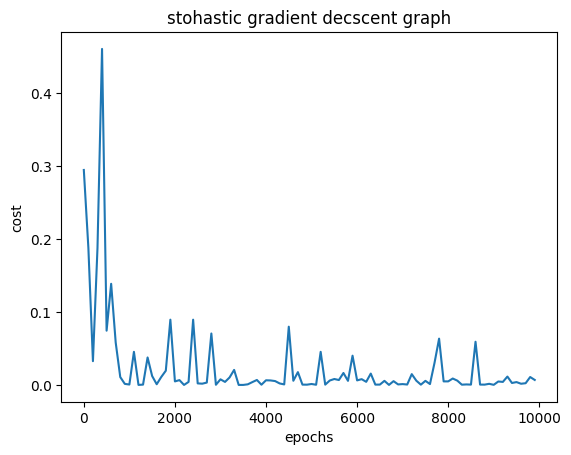

In [ ]:
plt.title("stohastic gradient decscent graph")
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list_sgd,cost_list_sgd)

In [ ]:
prediction(2600,4,w_sgd,b_sgd)

array([[128.72304767]])